![Title](Images/cisco.png)

# Lab - Internet Meter SQL</font>

### Objectives

<b>
* Part 1: Set up your Database
* Part 2: Connect to the Database
* Part 3: Manipulate the Data with Pandas
* Part 4: Join Tables with Pandas
</b>

### Scenario/Background
In this lab you will learn how to connect to a relational database, retrieve and manipulate the data through a Jupyter notebook. The data you are provided contain various measurements for ping, upload and download speed made in different Local Authorities around England. At the moment the data is stored in a csv file, but you will create a database and populate it with the measurement.

You will:
* Work with a relational database
* Set up SQLite
* Create a new database
* Use csvsql to create a new table and retrieve data directly from a big csv file
* Connect to a database with the sqlite3 Python library
* Perform basic SQL queries through Python
* Explore the interaction between Pandas and an SQL database
* Merge two tables

### Required Resources
* 1 PC with Internet access
* Raspberry Pi version 2 or higher
* Python libraries: sqlite3, pandas, matplotlib
* Additional libraries: csvkit
* Datafiles: LA_wifi_speed_UK.csv, LA_population.csv

### SQL refresh
* Very brief introduction to relational databases (temporary): http://searchsqlserver.techtarget.com/definition/relational-database</li>
* More videos on relational databases: https://www.youtube.com/watch?v=jyju2P-7hPA&list=PLAwxTw4SYaPm4R6j_wzVOCV9fJaiQDYx4</li>
* Introduction to SQL http://www.w3schools.com/sql/sql_intro.asp</li>

## Part 1: Set up your Database

In this part, you will use SQLite, an in-process library that implements a self-contained, serverless, zero-configuration, transactional SQL database engine to set up the environment.

#### Step 1: Set up the working environment.
We will need `sqlite3` and `csvkit` to complete this notebook.

###### a) Install SQLite.
In a Jupyter notebook, it is possible to run the same commands that would be used in the terminal. To do so, start the line with an exclamation mark (```!```).

In [1]:
# Code Cell 1
!apt-get update
!apt-get -y install sqlite3

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [46.6 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,419 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,455 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,279 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Hit:13 https://pp

After the installation process finishes, create a database:

    !sqlite3 <name of your database> ".databases"

*name of the database* is the name you want to give to your database, for example InternetSpeed:

    !sqlite3 InternetSpeed.db ".databases"
    
This code creates the database in a terminal window. If you are using the terminal, be sure to navigate to the same directory in which this lab resides.

In [5]:
# Code Cell 2
#Create the InternetSpeed database
!sqlite3 /content/InternetSpeed1.db ".databases"

main: /content/InternetSpeed1.db r/w


At this point, on your local machine, you have a new, empty database called InternetSpeed.
Usually, if you want to create a table, you need to provide a schema specifying the name of the table, the name of the columns, and the type of data that goes in every column (int, str, decimal, etc.).
<p>For the purpose of this course, A **synthetic** dataset with wifi speed measurements recorded in 300 locations in the United Kingdom is used for the purpose of this course. The file is structured in a way that each column contains the measurements for a location of one of the three statistics (ping, download, and upload). This means that the table we need has 300\*3 columns (plus the datetime, and an index column). Writing the schema for such a table by hand is unfeasible. Fortunately, there are ways to overcome this, and one of those is using the **csvkit** package, which contains the function **csvsql** that can be used to create a table and import the data in one command.</p>

###### b) Install csvkit.
Install csvkit at the terminal:

    $pip install csvkit
    
You can also stay in the notebook environment, as you have done previously, adding the exclamation mark at the beginning of the line.

The file used in this part of the lab is called LA_wifi_speed_UK.csv.

In [7]:
# Code Cell 3
#Installing csvkit
!pip install csvkit

###### c) Import the data into the database.
Use csvsql to create a new table in the database InternetSpeed and retrieve the data contained in the csv file. First, make sure that there is not another database with the same name. If one exists, remove it:
    
    $test -e InternetSpeed.db && rm InternetSpeed.db

Use csvkit to populate the database from the csv file:

    $csvsql --db sqlite:///InternetSpeed.db --insert ./Data/LA_wifi_speed_UK.csv
    
You can do this through the terminal or remain in the notebook environment.

In [8]:
# Code Cell 4
# Removing database if already existing
!test -e InternetSpeed.db && rm InternetSpeed.db
# Importing the LA_wifi_speed_UK.csv file into a sql database file InternetSpeed.db
!csvsql --db sqlite:///InternetSpeed.db --insert /content/LA_wifi_speed_UK.csv
# This will take a while

## Part 2: Connect to the Database

Python is used to connect to the database and run some queries to see what this data looks like.

Import the libraries:


In [9]:
# Code Cell 5
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data visualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline

You can find sqlite3 for Python documentation here: https://docs.python.org/2/library/sqlite3.html

#### Step 1: Connect and execute a query.
An open connection and a cursor is needed to communicate with the database. The cursor is a control structure that will enable us to navigate through tables and records.

To open a connection, call the method `connect` of the library `sqlite3`. This function takes a string containing the name of the database for which the connection is needed.

In this case, the command will be:

    sqlite3.connect('InternetSpeed.db')

This function returns the connection that will be stored as a variable, called `conn`. To create the cursor, call the method `cursor()` in the following way:

    conn.cursor()

Save it in a variable called `cur`.


###### a) Connect to the database you just created, and then create a cursor pointing to the database.


In [10]:
# Code Cell 6
# what is the name of the database you want to connect to?
# conn = sqlite3.connect(??)
#SOLUTION:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In order to execute a query on the database, we will need to use the cursor we just created and the method `execute()`. This method takes as input a string containing the query we are interested in. We can store the string in a variable, let's call it `query`. Call the method in this way:

    cur.execute(query)

The table we want to query is not very good for visualization, so we are going to SELECT only the column DateTime, that contains date and time of the measurements. We will LIMIT the number of rows retrieved by the query to 10.

###### b) Execute a query.
Select the first 10 rows from the DateTime column.

Hint: if you want to check the name of the tables in your database, go back to the interactive command line and use this code:
    
    .tables

In [11]:
# Code Cell 7
# complete the query with the field you want to select, the table you want to select the field from,
# and the field you want your results to be ordered by
#query = 'SELECT ? FROM ? ORDER BY ? LIMIT ?;'

# SOLUTION:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10;'

cur.execute(query)

The query result is stored in `cur`. We need to iterate over it in order to visualize the result.

In [12]:
# Code Cell 8
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


**Note**: We need to sort the table containing the measurement according to the column DateTime. This is because SQL does not have an intrinsic ordering of the rows, and we are dealing with a time series, that without the correct ordering, don't make any sense. Selecting a random sample of rows would remove the temporal component:


In [ ]:
# Code Cell 9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print(row)

('2016-11-25 03:00:00.000000',)
('2016-12-03 17:00:00.000000',)
('2016-11-26 01:00:00.000000',)
('2016-11-24 19:00:00.000000',)
('2016-12-09 10:00:00.000000',)
('2016-11-26 11:00:00.000000',)
('2016-11-23 10:30:00.000000',)
('2016-12-08 17:00:00.000000',)
('2016-12-04 04:00:00.000000',)
('2016-12-04 21:30:00.000000',)


#### Step 2: Focus on a portion of the data.

What are the names of the 900+ columns? It is possible to automatically retrieve them and store them in a list. It will come in handy for different things later.

First of all, we need to execute a query over all the columns. In this case, it is not important the number of rows the query returns, so we will limit it to 1.

In [13]:
# Code Cell 10
# we need to have a cursor pointing to a table for this operation
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

The name of the columns of the table are stored in the field `description` of the cursor.

In [14]:
# Code Cell 11
#visualizing the first 10 rows of the field description
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

We can loop over the members of this field and put the names of the columns in a list (a handy data structure in this case).
In Python, it is possible to generate lists as the output of a for loop. This concept is called list comprehension and it is just another name for a longer for loop. Each element of the output list is the operation you would do inside the for loop, while iterating over a certain set.  

In [15]:
# Code Cell 12
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:]

The columns contain the measurements of the three speeds for each geographical area. They are in this form:

`<area name>_<suffix>`,

Suffix is `p` for ping, `u` for upload and `d` for download.

We need to get rid of the suffixes, since we are interested in the names of the area, and at the moment each name is repeated three times. We will use the name of the areas to visualize the various measurements and to generate a new table later in the lab.

We can replace the final part of the string with an empty character. To do so, we can use the method `replace()` (see string documentation, https://docs.python.org/2/library/string.html).
This method takes as input the part of the string to be replaced and the new piece of string to replace. For instance, to remove the characters `e` and `s` from the string `'chestnut'`, use this code:
    
    'chestnut'.replace('es', '')

###### a) Get area names.
Use list comprehension to loop over the list containing the names of the columns of the table and remove the suffixes "_p", "_d", and "_u".

In [16]:
# Code Cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
# columns = ??

# SOLUTION:
columns = [c.replace('_u', '') for c in columns]

# this operation is to remove duplicates
columns = list(set(columns))

In [17]:
# Code Cell 14
# visualize the first 10 areas
columns[:10]

['E06000007',
 'E08000013',
 'E06000020',
 'E08000001',
 'E07000117',
 'E06000039',
 'E06000044',
 'E07000165',
 'E07000124',
 'E08000011']

The best way to understand the data in the database is to visualize a part of it. In particular, we want to select the three statistics for an area. First of all, let's pick the first area we have in the dataset:

In [18]:
# Code Cell 15
area = columns[0]
print(area)

E06000007


Now we want to visualize the data relative to the area `E07000101`. We need to select the columns containing the three measurements for this area. To do so, we need to manipulate strings again.

One way to format a string is:

    'We are considering {} area and {} statistics'.format(1, 3)
    
    We are considering 1 area and 3 statistics

We need to add the suffixes back in to get the correct column names. The first thing to do is to build a dictionary that associates the complete name of the measurement to the suffix. This is also going to be helpful to write a meaningful legend in the plot.

In [20]:
# Code Cell 16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print(suffix.keys())

# we have the complete names as the values of the dictionary
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Now the process is to loop over the keys of the dictionary, write and execute the query to select the measurement relative to our area and, plot them using this code:

    plt.plot(cur.fetchall(), label=suffix[s])
    
The method `fetchall()` retrieves all the rows of the query result. The field `label` will be used to produce the legend of the plot. We can also add a title to the plot, using the method `title()`.

###### b) Write the query to select the relevant columns.

Text(0.5, 1.0, 'E06000007')

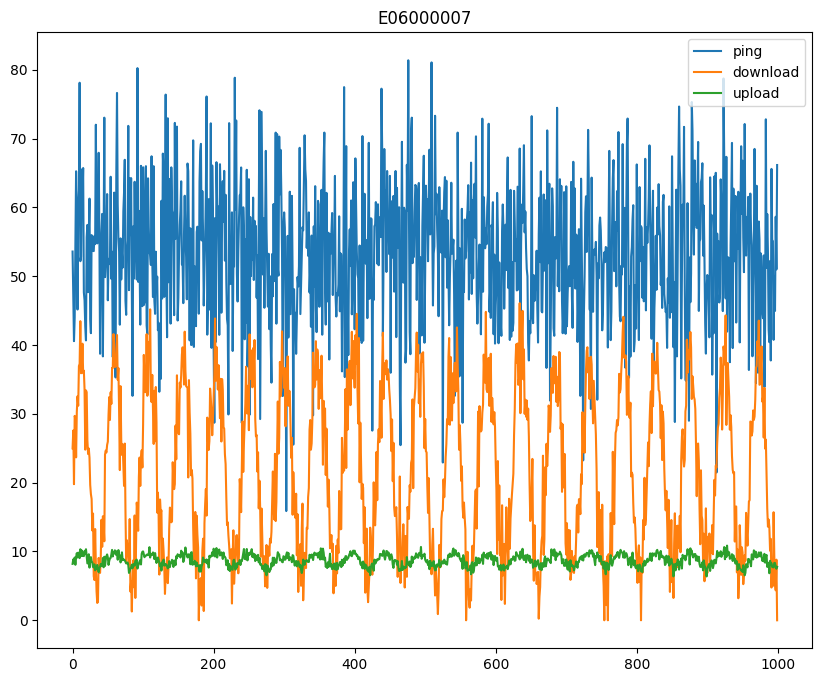

In [21]:
# Code Cell 17
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    # query = ??
    # SOLUTION:
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

## Part 3: Manipulate the data with Pandas

The goal now is to calculate the average wifi speed for all the areas in the dataset. Pandas can help in storing and visualizing the data easily.

#### Step 1: Convert all measurements to averages.
For each Local Authority. we want to know what the average internet speed for ping, upload, and download was in the period of time over which our data was collected. Pandas dataframes are handy for this kind of operations.

###### a) Create an empty dataframe with specific columns.

     ['Area', 'Average_p', 'Average_d', 'Average_u']

Note: the order of the new specific columns is aligned with the order of keys in the output of `suffix.keys()`, that is `['_p', '_d', '_u']`.

In [22]:
# Code Cell 18
#new_columns = ?
#df = pd.DataFrame(columns = ?)

# SOLUTION:
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns = new_columns)

An interesting metric is the average speed of ping, upload, and download for every area. To compute it, we need to loop over the columns, and for each area, for each statistic, we want to compute the average. We will then insert it in the empty dataframe we have just created.

To do so, we will create a temporary list and populate it with the three metrics for each area. This is going to be the row we are going to insert in the dataframe.

To refresh the commands:

* Loop over the list containing the name of the areas.
* Loop over the three suffixes (keys of dictionary `suffix`).
* Write the query to select the average of the metric for an area, using string formatters.
* Execute the query and fetch the result (method `fetchone()`).
* Append the average to the temporary list (method `append()`).
* At the end of the internal loop, insert the temporary list in the dataframe (method `append()`, parameter `ignore_index=True`).

###### b) Compute the averages.
Write the SQL query that computes the average of a column and store it in a temporary list. The list will be the new row appended to the dataframe. This will take about 1 minute on the RaPi.

In [23]:
# Code Cell 19
# this will take a while...
for i in range(len(columns)-1): #EDL : replace xrange with range
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        # query = ??
        # SOLUTION:
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i], s)

        cur.execute(query)

        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
# SOLUTION:
df.head()

<ipython-input-23-00cc6b3bd79e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
<ipython-input-23-00cc6b3bd79e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
<ipython-input-23-00cc6b3bd79e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
<ipython-input-23-00cc6b3bd79e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
<ipython-input-23-00

,Area,Average_p,Average_d,Average_u
0,E06000007,53.365709,22.141549,8.715658
1,E08000013,53.490657,21.594366,8.631623
2,E06000020,52.311067,21.650404,8.616171
3,E08000001,54.884848,22.571545,9.024592
4,E07000117,51.539458,20.631205,8.327936


It is possible to visualize the averages for each area using `plot()`. This will show whether the average speed is the same throughout the different areas or not.

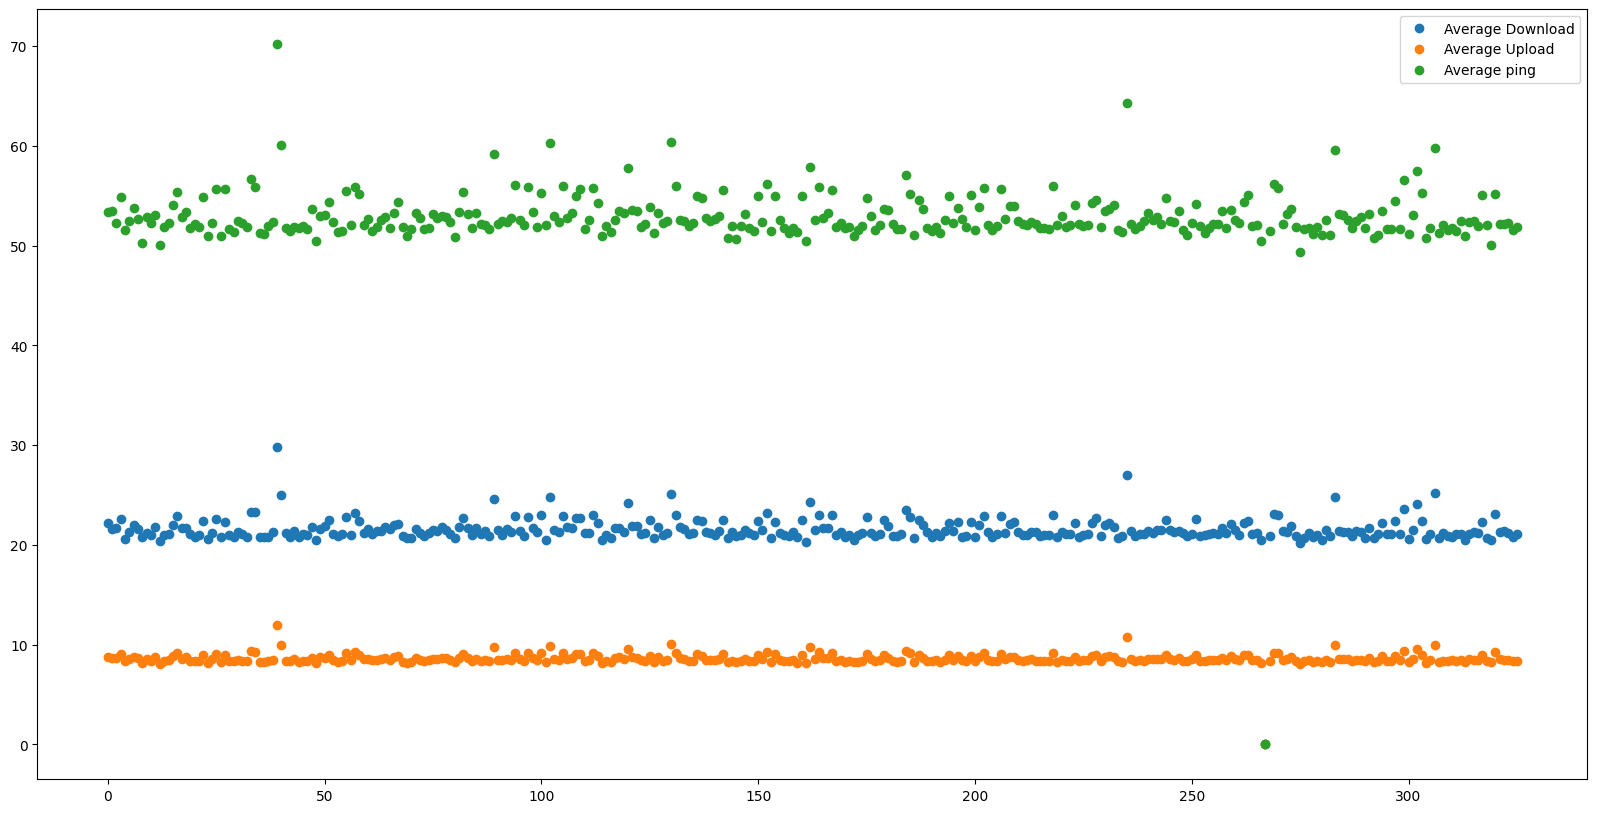

In [24]:
# Code Cell 20
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_d','Average_u','Average_p']], 'o')
plt.legend(['Average Download', 'Average Upload', 'Average ping'])

Now the average speeds are stored in a Pandas dataframe. It might be useful to save them to a table in our database, and Pandas offers a method (`to_sql()`) to do so.
We will first check whether the table already exists (this might create problems). If it exists, we want to drop it, and then create it. Otherwise we will directly create it.

The construct `try... except` will capture the exception raised in case the table does not exist, and proceed to the creation of the table (for help, see Section 8.3 of https://docs.python.org/2.7/tutorial/errors.html).

###### c) Save the work.
Save the new dataframe to a table in the InternetSpeed database.

In [25]:
# Code Cell 21
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# what is the name of the table you want to save? To what connection?
# Save the dataframe table into a SQL table
# df.to_sql(?,?)

# SOLUTION:
df.to_sql('average_speed', conn)

326

In [26]:
# Code Cell 22
# just checking everything worked fine: select everything from the table we just created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E06000007', 53.36570899018156, 22.141549089258717, 8.71565819697993)
(1, 'E08000013', 53.49065740151429, 21.594365770886878, 8.631623487674833)


## Part 4: Join Tables

To understand why and how the average Internet speed changes around the areas, we need more information about them. In particular, we are interested in how populated they are, to see if a crowded area has better or worse Internet service.

#### Step 1: Get relevant information.
This information can be found in this file:

    ./Data/LA_population.csv
    
Here, LA stands for Local Authority, rather than Los Angeles.
We want to join the information contained in this file with the average speed computed earlier.
First, create a new table and store this data in the InternetSpeed database.

###### a) Create the population table.
Using csvsql, import the file LA_population.csv into the InternetSpeed database. Repeat the steps done to create the other tables in the database.

In [27]:
# Code Cell 23
#first close the database file, otherwise the external csvsql command cannot use
conn.close()

In [28]:
# Code Cell 24
# use the external csvsql command to add to the DB file data from the CSV file
#!csvsql --db sqlite:///...

#SOLUTION:
!csvsql --db sqlite:///InternetSpeed.db --insert /content/LA_population.csv

In [29]:
# Code Cell 25
#reopen the DB file
#conn = sqlite3.connect(...)

# SOLUTION:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

###### b) Test that everything worked.
To test that everything worked and to have an idea of what is inside this new table, select the first 10 rows and print them.

In [30]:
# Code Cell 26
#query = ?
# SOLUTION:
query = 'SELECT * FROM LA_population LIMIT 10'

#cur.execute(?)
# SOLUTION:
cur.execute(query)

for row in cur:
    # print the first fetched record
    # SOLUTION:
    print(row)

('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


We can join the two tables in order to have all the information needed. The idea is that the two tables have a field in common, the area name. This is the key on which we want to join. It means that we want a new table that has a row for each area name that contains both the average speed information and the geographical information. The way SQL does this is comparing row by row, and merging together the rows with the same value for the key (i.e., the same area name).

###### c) Execute the JOIN query and print the first 10 rows of the result.

In [31]:
# Code Cell 27
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    #print ?

    # SOLUTION:
    print(row)

    k+=1

(0, 'E06000007', 53.36570899018156, 22.141549089258717, 8.71565819697993, 'Warrington', 'E06000007', 202228.0)
(1, 'E08000013', 53.49065740151429, 21.594365770886878, 8.631623487674833, 'St. Helens', 'E08000013', 175308.0)
(2, 'E06000020', 52.311067204712764, 21.65040411893273, 8.616170714102104, 'Telford and Wrekin', 'E06000020', 166641.0)
(3, 'E08000001', 54.88484781537253, 22.571544634325228, 9.024591950275786, 'Bolton', 'E08000001', 276786.0)
(4, 'E07000117', 51.53945800742985, 20.631205214910192, 8.327936066197628, 'Burnley', 'E07000117', 87059.0)
(5, 'E06000039', 52.431695010853765, 21.251761070814247, 8.520327608707184, 'Slough', 'E06000039', 140205.0)
(6, 'E06000044', 53.770884595419766, 21.984499003450406, 8.750949333189466, 'Portsmouth', 'E06000044', 205056.0)
(7, 'E07000165', 52.708799108572606, 21.5561080787063, 8.610279192529896, 'Harrogate', 'E07000165', 157869.0)
(8, 'E07000124', 50.22105700696352, 20.759189346942872, 8.181407344034819, 'Ribble Valley', 'E07000124', 5713

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>